In [74]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.feature_selection import RFECV
import seaborn as sns
import statsmodels.api as sm

In [75]:
df = pd.read_csv("../csv/house_data.csv")
df = df.drop("id",axis=1)
df["date"] = df["date"].map(lambda x:int(x.replace("T000000","")))
display(df.info())
display(df.describe())
display(df.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

None

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,2.014390e+07,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,4.436582e+03,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,2.014050e+07,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.014072e+07,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,2.014102e+07,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,2.015022e+07,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,2.015053e+07,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


<AxesSubplot:>

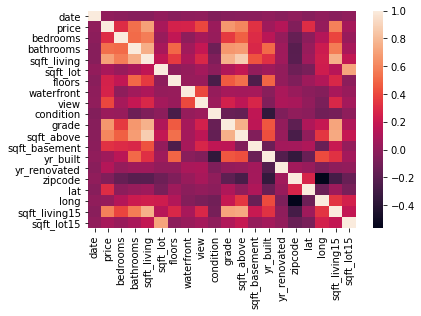

In [76]:
sns.heatmap(df.corr(),annot=False)



In [77]:
df["is_renovated"]=df["yr_renovated"]>0
df["sqft_basement"]=df["sqft_basement"]>0
df["zipcode"] = df["zipcode"].map(df["zipcode"].value_counts())
y = df["price"]
X = df.drop("price",axis=1)
y = y.values.reshape(-1,1)

In [78]:
ss =  sklearn.preprocessing.StandardScaler()
X = ss.fit_transform(X)
ss =  sklearn.preprocessing.StandardScaler()
y = ss.fit_transform(y)

In [79]:
model = sm.OLS(y,X)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.700
Model:                            OLS   Adj. R-squared (uncentered):              0.699
Method:                 Least Squares   F-statistic:                              2513.
Date:                Wed, 16 Dec 2020   Prob (F-statistic):                        0.00
Time:                        20:02:29   Log-Likelihood:                         -17674.
No. Observations:               21613   AIC:                                  3.539e+04
Df Residuals:                   21593   BIC:                                  3.555e+04
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0394      0.004     10.522      0.000       0.032       0.047
x2            -0.0871      0.005    -18.182      0.000      -0.096      -0.078
x3             0.0872      0.007     12.653      0.000       0.074       0.101
x4             0.3878      0.015     25.096      0.000       0.358       0.418
x5             0.0139      0.005      2.577      0.010       0.003       0.025
x6             0.0034      0.005      0.645      0.519      -0.007       0.014
x7             0.1398      0.004     34.125      0.000       0.132       0.148
x8             0.1004      0.004     22.510      0.000       0.092       0.109
x9             0.0608      0.004     14.595      0.000       0.053       0.069
x10            0.3087      0.007     44.581      0.000       0.295       0.322
x11            0.0531      0.015      3.458      0.001       0.023       0.083
x12           -0.0140      0.007     -1.997      0.046      -0.028      -0.000
x13           -0.1915      0.006    -33.071      0.000      -0.203      -0.180
x14            3.8550      0.474      8.139      0.000       2.927       4.783
x15           -0.0413      0.004    -10.842      0.000      -0.049      -0.034
x16            0.2187      0.004     54.790      0.000       0.211       0.227
x17           -0.0468      0.005    -10.187      0.000      -0.056      -0.038
x18            0.0538      0.006      8.384      0.000       0.041       0.066
x19           -0.0333      0.005     -6.094      0.000      -0.044      -0.023
x20           -3.8307      0.474     -8.088      0.000      -4.759      -2.902
==============================================================================
Omnibus:                    18429.977   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1898256.193
Skew:                           3.576   Prob(JB):                         0.00
Kurtosis:                      48.351   Cond. No.                         405.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

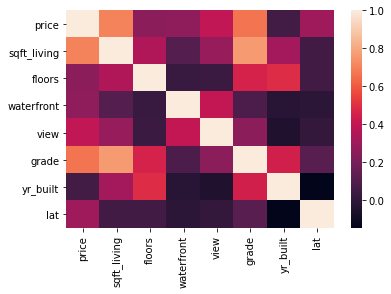

In [80]:

df_manual = df.drop(["yr_renovated","date","sqft_lot","sqft_lot15","long",
              "sqft_living15","sqft_above","sqft_basement","bathrooms",
              "bedrooms","zipcode","condition","is_renovated"],axis=1)
sns.heatmap(df_manual.corr(),annot=False)
X_manual = df_manual.drop("price",axis=1)

In [81]:
ss =  sklearn.preprocessing.StandardScaler()
X_manual = ss.fit_transform(X_manual)

model = sm.OLS(y,X_manual)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.684
Model:                            OLS   Adj. R-squared (uncentered):              0.684
Method:                 Least Squares   F-statistic:                              6695.
Date:                Wed, 16 Dec 2020   Prob (F-statistic):                        0.00
Time:                        20:02:29   Log-Likelihood:                         -18203.
No. Observations:               21613   AIC:                                  3.642e+04
Df Residuals:                   21606   BIC:                                  3.648e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4275      0.006     71.385      0.000       0.416       0.439
x2             0.0289      0.005      6.252      0.000       0.020       0.038
x3             0.1431      0.004     34.259      0.000       0.135       0.151
x4             0.1140      0.004     25.813      0.000       0.105       0.123
x5             0.3600      0.007     55.041      0.000       0.347       0.373
x6            -0.2159      0.005    -45.056      0.000      -0.225      -0.206
x7             0.2114      0.004     53.152      0.000       0.204       0.219
==============================================================================
Omnibus:                    18756.400   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1945805.824
Skew:                           3.683   Prob(JB):                         0.00
Kurtosis:                      48.896   Cond. No.                         3.42
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
rfe = RFECV(LinearRegression(),cv=10)
rfe = rfe.fit(X,y)
display(rfe.support_)
display(rfe.ranking_)


array([ True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True])

array([1, 1, 1, 1, 3, 4, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1])

In [83]:
model = sm.OLS(y,X[:,rfe.support_])
result = model.fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.699
Model:                            OLS   Adj. R-squared (uncentered):              0.699
Method:                 Least Squares   F-statistic:                              2955.
Date:                Wed, 16 Dec 2020   Prob (F-statistic):                        0.00
Time:                        20:02:30   Log-Likelihood:                         -17680.
No. Observations:               21613   AIC:                                  3.539e+04
Df Residuals:                   21596   BIC:                                  3.553e+04
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0394      0.004     10.518      0.000       0.032       0.047
x2            -0.0874      0.005    -18.258      0.000      -0.097      -0.078
x3             0.0867      0.007     13.136      0.000       0.074       0.100
x4             0.3646      0.010     34.895      0.000       0.344       0.385
x5             0.1398      0.004     34.118      0.000       0.132       0.148
x6             0.1012      0.004     22.738      0.000       0.092       0.110
x7             0.0609      0.004     14.661      0.000       0.053       0.069
x8             0.3083      0.007     44.838      0.000       0.295       0.322
x9             0.0802      0.009      9.076      0.000       0.063       0.097
x10           -0.1910      0.006    -33.768      0.000      -0.202      -0.180
x11            3.8516      0.473      8.135      0.000       2.924       4.780
x12           -0.0413      0.004    -10.829      0.000      -0.049      -0.034
x13            0.2182      0.004     55.065      0.000       0.210       0.226
x14           -0.0454      0.005    -10.053      0.000      -0.054      -0.037
x15            0.0520      0.006      8.185      0.000       0.040       0.064
x16           -0.0238      0.004     -6.006      0.000      -0.032      -0.016
x17           -3.8270      0.473     -8.083      0.000      -4.755      -2.899
==============================================================================
Omnibus:                    18431.586   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1897135.640
Skew:                           3.577   Prob(JB):                         0.00
Kurtosis:                      48.337   Cond. No.                         392.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
for i in [1,0.5,0.2,0.1,0.05,0.02,0.01,0.005,0.002,0.001]:
    cls = Lasso(i)
    cls.fit(X,y)
    print(i)
    print("intercept",cls.intercept_)
    print("coef",cls.coef_)
    print("score",cls.score(X,y))

1
intercept [-3.6820796e-17]
coef [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.
  0.  0.]
score 0.0
0.5
intercept [-8.78743164e-17]
coef [ 0.          0.          0.          0.17773221  0.          0.
  0.          0.          0.          0.0318771   0.          0.
 -0.          0.         -0.          0.         -0.          0.
  0.          0.        ]
score 0.2508529983736608
0.2
intercept [2.16145393e-15]
coef [ 0.          0.          0.          0.34174105  0.          0.
  0.          0.05292833  0.          0.18578048  0.          0.
 -0.          0.         -0.          0.06753155 -0.          0.
 -0.          0.        ]
score 0.5352625849286972
0.1
intercept [5.11480089e-15]
coef [ 0.         -0.          0.          0.38690568  0.          0.
  0.06894019  0.09330003  0.          0.24875815  0.          0.
 -0.05105099  0.         -0.          0.15114801 -0.          0.
 -0.          0.        ]
score 0.6367323360959947
0.05
intercept [6.33094482

In [85]:
for i in [1,0.5,0.2,0.1,0.05,0.02,0.01,0.005,0.002,0.001]:
    cls = Ridge(i)
    cls.fit(X,y)
    print(i)
    print("intercept",cls.intercept_)
    print("coef",cls.coef_)
    print("score",cls.score(X,y))

1
intercept [1.13837584e-14]
coef [[ 0.0392966  -0.08677641  0.08852717  0.38948484  0.01362848  0.00279532
   0.13891089  0.10012616  0.05956793  0.31040004  0.05043009 -0.0145189
  -0.19165755  1.55460139 -0.04124532  0.21854874 -0.04684824  0.05291328
  -0.03314738 -1.53031685]]
score 0.6991807086710922
0.5
intercept [1.13874744e-14]
coef [[ 0.03931844 -0.08687402  0.08813432  0.3890693   0.01371906  0.00297209
   0.1391717   0.10019603  0.05992143  0.30992708  0.0511562  -0.01438409
  -0.19161968  2.21345495 -0.04126402  0.21858861 -0.04684474  0.05315685
  -0.03319224 -2.18914584]]
score 0.6993418364493478
0.2
intercept [1.13915304e-14]
coef [[ 0.0393427  -0.08698019  0.0876841   0.38851884  0.01382294  0.00317161
   0.13947062  0.10028002  0.06033035  0.30937326  0.05205797 -0.0142025
  -0.19157053  2.97209488 -0.0412849   0.21863336 -0.04684243  0.05344382
  -0.03324237 -2.94775549]]
score 0.6994606518250738
0.1
intercept [1.13935424e-14]
coef [[ 3.93548204e-02 -8.70327926e-02  

In [86]:
for i in [1,0.5,0.2,0.1,0.05,0.02,0.01,0.005,0.002,0.001]:
    for j in [i*0.1 for i in range(1,10)]:
        cls = ElasticNet(alpha=i,l1_ratio=j)
        cls.fit(X,y)
        print(i,j)
        print("intercept",cls.intercept_)
        print("coef",cls.coef_)
        print("score",cls.score(X,y))

1 0.1
intercept [3.08364166e-15]
coef [ 0.          0.          0.05129375  0.15341369  0.          0.
  0.04814121  0.07894105  0.          0.14003189  0.08570233  0.00879836
 -0.0131209   0.         -0.          0.09207564 -0.          0.07929886
  0.          0.        ]
score 0.5438471384306791
1 0.2
intercept [1.43341959e-15]
coef [ 0.          0.          0.02202184  0.15165873  0.          0.
  0.00556126  0.04919493  0.          0.12870683  0.0603636   0.
 -0.          0.         -0.          0.0448719  -0.          0.05872062
  0.          0.        ]
score 0.45517200181863016
1 0.30000000000000004
intercept [-1.09309161e-16]
coef [ 0.          0.          0.          0.14866441  0.          0.
  0.          0.00548272  0.          0.11804469  0.03433843  0.
 -0.          0.         -0.          0.         -0.          0.03651033
  0.          0.        ]
score 0.357414948568355
1 0.4
intercept [-9.54969114e-17]
coef [ 0.          0.          0.          0.13724309  0.        